# **IMPORTACIÓN DE LIBRERÍAS**

**LIBRERÍAS DE CIENCIA DE DATOS**

In [1]:
import pandas
import numpy
import seaborn
import matplotlib.pyplot
import tensorflow

**LIBRERÍAS ESPECÍFICAS**

In [2]:
from google.colab import drive
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier

# **IMPORTACIÓN DEL "DATA SET"**

**CONEXIÓN CON DRIVE**

In [3]:
try:
  drive.mount("/content/imported_data")
except:
  print("Ha ocurrido un error")
else:
  print("Finalizado.")

Mounted at /content/imported_data
Finalizado.


**IMPORTACIÓN**

In [4]:
try:
  data_set = pandas.read_csv(
      "/content/imported_data/MyDrive/DataSets/AlumnosZaragoza.csv"
  )
except:
  print("No se ha podido realizar la acción.")
else:
  print("Finalizado.")

Finalizado.


# **EXPLORACIÓN DEL "DATA SET"**

**VISUALIZACIÓN ALEATORIA**

In [5]:
middle_row = len(data_set.index) / 2
data_set.loc[middle_row]

CURSO_ACADEMICO                             2021
LOCALIDAD                               Zaragoza
ESTUDIO                         Grado: Filosofía
TIPO_ESTUDIO                               Grado
TIPO_EGRESO                             Graduado
SEXO                                     Hombres
ALUMNOS_GRADUADOS                             14
ALUMNOS_INTERRUMPEN_ESTUDIOS                   0
ALUMNOS_INTERRUMPEN_EST_ANO1                   0
ALUMNOS_TRASLADAN_OTRA_UNIV                    0
DURACION_MEDIA_GRADUADOS                    5,25
TASA_EFICIENCIA                            84,35
FECHA_ACTUALIZACION                   30/10/2022
Name: 379, dtype: object

**VISUALIZACIÓN COMPLETA**

In [6]:
data_set

,CURSO_ACADEMICO,LOCALIDAD,ESTUDIO,TIPO_ESTUDIO,TIPO_EGRESO,SEXO,ALUMNOS_GRADUADOS,ALUMNOS_INTERRUMPEN_ESTUDIOS,ALUMNOS_INTERRUMPEN_EST_ANO1,ALUMNOS_TRASLADAN_OTRA_UNIV,DURACION_MEDIA_GRADUADOS,TASA_EFICIENCIA,FECHA_ACTUALIZACION
0,2021,Almunia de Doña Godina (La),Grado: Arquitectura Técnica,Grado,Abandono Voluntario,Hombres,0,12,5,0,NaN,NaN,30/10/2022
1,2021,Almunia de Doña Godina (La),Grado: Arquitectura Técnica,Grado,Abandono Voluntario,Mujeres,0,5,3,0,NaN,NaN,30/10/2022
2,2021,Almunia de Doña Godina (La),Grado: Arquitectura Técnica,Grado,Cambio de estudios sin simultaneidad,Mujeres,0,1,1,0,NaN,NaN,30/10/2022
3,2021,Almunia de Doña Godina (La),Grado: Arquitectura Técnica,Grado,Graduado,Hombres,5,0,0,0,"7,00","70,00",30/10/2022
4,2021,Almunia de Doña Godina (La),Grado: Arquitectura Técnica,Grado,Graduado,Mujeres,2,0,0,0,"11,00","75,72",30/10/2022
...,...,...,...,...,...,...,...,...,...,...,...,...,...
753,2021,Zaragoza,Relaciones Laborales,Diplomatura o equivalente,Traslado a otra Universidad,Hombres,0,0,0,1,NaN,NaN,30/10/2022
754,2021,Zaragoza,Relaciones Laborales,Diplomatura o equivalente,Traslado a otra Universidad,Mujeres,0,0,0,2,NaN,NaN,30/10/2022
755,2021,Zaragoza,Terapia Ocupacional,Diplomatura o equivalente,Traslado a otra Universidad,Mujeres,0,0,0,1,NaN,NaN,30/10/2022
756,2021,Zaragoza,Trabajo Social,Diplomatura o equivalente,Traslado a otra Universidad,Hombres,0,0,0,1,NaN,NaN,30/10/2022


**VISUALIZACIÓN INICIO**

In [7]:
data_set.head(5)

,CURSO_ACADEMICO,LOCALIDAD,ESTUDIO,TIPO_ESTUDIO,TIPO_EGRESO,SEXO,ALUMNOS_GRADUADOS,ALUMNOS_INTERRUMPEN_ESTUDIOS,ALUMNOS_INTERRUMPEN_EST_ANO1,ALUMNOS_TRASLADAN_OTRA_UNIV,DURACION_MEDIA_GRADUADOS,TASA_EFICIENCIA,FECHA_ACTUALIZACION
0,2021,Almunia de Doña Godina (La),Grado: Arquitectura Técnica,Grado,Abandono Voluntario,Hombres,0,12,5,0,NaN,NaN,30/10/2022
1,2021,Almunia de Doña Godina (La),Grado: Arquitectura Técnica,Grado,Abandono Voluntario,Mujeres,0,5,3,0,NaN,NaN,30/10/2022
2,2021,Almunia de Doña Godina (La),Grado: Arquitectura Técnica,Grado,Cambio de estudios sin simultaneidad,Mujeres,0,1,1,0,NaN,NaN,30/10/2022
3,2021,Almunia de Doña Godina (La),Grado: Arquitectura Técnica,Grado,Graduado,Hombres,5,0,0,0,"7,00","70,00",30/10/2022
4,2021,Almunia de Doña Godina (La),Grado: Arquitectura Técnica,Grado,Graduado,Mujeres,2,0,0,0,"11,00","75,72",30/10/2022


**VISUALIZACIÓN FINAL**

In [8]:
data_set.tail(5)

,CURSO_ACADEMICO,LOCALIDAD,ESTUDIO,TIPO_ESTUDIO,TIPO_EGRESO,SEXO,ALUMNOS_GRADUADOS,ALUMNOS_INTERRUMPEN_ESTUDIOS,ALUMNOS_INTERRUMPEN_EST_ANO1,ALUMNOS_TRASLADAN_OTRA_UNIV,DURACION_MEDIA_GRADUADOS,TASA_EFICIENCIA,FECHA_ACTUALIZACION
753,2021,Zaragoza,Relaciones Laborales,Diplomatura o equivalente,Traslado a otra Universidad,Hombres,0,0,0,1,NaN,NaN,30/10/2022
754,2021,Zaragoza,Relaciones Laborales,Diplomatura o equivalente,Traslado a otra Universidad,Mujeres,0,0,0,2,NaN,NaN,30/10/2022
755,2021,Zaragoza,Terapia Ocupacional,Diplomatura o equivalente,Traslado a otra Universidad,Mujeres,0,0,0,1,NaN,NaN,30/10/2022
756,2021,Zaragoza,Trabajo Social,Diplomatura o equivalente,Traslado a otra Universidad,Hombres,0,0,0,1,NaN,NaN,30/10/2022
757,2021,Zaragoza,Trabajo Social,Diplomatura o equivalente,Traslado a otra Universidad,Mujeres,0,0,0,1,NaN,NaN,30/10/2022


**VISUALIZACIÓN TÉCNICA**

In [9]:
data_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 758 entries, 0 to 757
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   CURSO_ACADEMICO               758 non-null    int64 
 1   LOCALIDAD                     758 non-null    object
 2   ESTUDIO                       758 non-null    object
 3   TIPO_ESTUDIO                  758 non-null    object
 4   TIPO_EGRESO                   758 non-null    object
 5   SEXO                          758 non-null    object
 6   ALUMNOS_GRADUADOS             758 non-null    int64 
 7   ALUMNOS_INTERRUMPEN_ESTUDIOS  758 non-null    int64 
 8   ALUMNOS_INTERRUMPEN_EST_ANO1  758 non-null    int64 
 9   ALUMNOS_TRASLADAN_OTRA_UNIV   758 non-null    int64 
 10  DURACION_MEDIA_GRADUADOS      291 non-null    object
 11  TASA_EFICIENCIA               222 non-null    object
 12  FECHA_ACTUALIZACION           758 non-null    object
dtypes: int64(5), object(

**VISUALIZACIÓN CATEGÓRICA**

In [10]:
categoricals = [
    "CURSO_ACADEMICO",
    "LOCALIDAD",
    "ESTUDIO",
    "TIPO_ESTUDIO",
    "TIPO_EGRESO",
    "SEXO"
]
for i in data_set[categoricals[0]].unique():
  print(i)
print("==========")
for j in data_set[categoricals[1]].unique():
  print(j)
print("==========")
for k in data_set[categoricals[2]].unique():
  print(k)
print("==========")
for l in data_set[categoricals[3]].unique():
  print(l)
print("==========")
for m in data_set[categoricals[4]].unique():
  print(m)
print("==========")
for n in data_set[categoricals[5]].unique():
  print(n)

2021
Almunia de Doña Godina (La)
Huesca
Teruel
Zaragoza
Grado: Arquitectura Técnica
Grado: Ingeniería Civil
Grado: Ingeniería de Organización Industrial
Grado: Ingeniería Mecatrónica
Grado: Programa conjunto en Ingeniería Mecatrónica-Ingeniería de Organización  Industrial
Grado: Administración y Dirección de Empresas
Grado: Ciencias Ambientales
Grado: Ciencias de la Actividad Física y del Deporte
Grado: Enfermería
Grado: Gestión y Administración Pública
Grado: Ingeniería Agroalimentaria y del Medio Rural
Grado: Magisterio en Educación Infantil
Grado: Magisterio en Educación Primaria
Grado: Medicina
Grado: Nutrición Humana y Dietética
Grado: Odontología
Grado: Programa conjunto en Nutrición Humana y Dietética-Ciencias de la Actividad Física y del Deporte
Máster: Dirección y planificación del turismo
Máster: Estudios Avanzados sobre el Lenguaje, la Comunicación y sus Patologías
Máster: Evaluación y Entrenamiento Físico para la Salud
Máster: Ingeniería Agronómica
Máster: Profesorado E.S.O

**VISUALIZACIÓN NUMÉRICA**

In [11]:
numerics = [
    "ALUMNOS_GRADUADOS",
    "ALUMNOS_INTERRUMPEN_ESTUDIOS",
    "ALUMNOS_INTERRUMPEN_EST_ANO1",
    "ALUMNOS_TRASLADAN_OTRA_UNIV"
]
data_set[[
    numerics[0],
    numerics[1],
    numerics[2],
    numerics[3]
]].describe()

,ALUMNOS_GRADUADOS,ALUMNOS_INTERRUMPEN_ESTUDIOS,ALUMNOS_INTERRUMPEN_EST_ANO1,ALUMNOS_TRASLADAN_OTRA_UNIV
count,758.000000,758.000000,758.000000,758.000000
mean,6.779683,2.630607,1.199208,0.349604
std,21.462209,6.833805,3.229430,1.309630
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000
75%,4.000000,2.000000,1.000000,0.000000
max,233.000000,98.000000,37.000000,14.000000


**VISUALIZACIÓN MICELANIA**

In [12]:
apparently_categoricals = [
    "DURACION_MEDIA_GRADUADOS",
    "TASA_EFICIENCIA",
    "FECHA_ACTUALIZACION"
]

# **FASE: "DATA CLEANING"**

**DEPURACIÓN DE VARIABLES INNECESARIAS**

In [13]:
to_drop = [
    "CURSO_ACADEMICO",
    "FECHA_ACTUALIZACION"
]
try:
  data_set.drop(columns = to_drop, inplace = True)
  categoricals.remove(to_drop[0])
  apparently_categoricals.remove(to_drop[1])
except:
  print("Ha ocurrido un error en la definición de columnas.")
else:
  for i in to_drop:
    print("Columna eliminada:" + i)

Columna eliminada:CURSO_ACADEMICO
Columna eliminada:FECHA_ACTUALIZACION


# **FASE: "DATA CURATION"**

**CONVERSIÓN DE CATEGÓRICO A NUMÉRICO**

In [14]:
try:
  data_set[categoricals[0]] = data_set[categoricals[0]].apply(
      lambda z:
      0 if z == "Zaragoza" else 1
  )
  data_set[categoricals[1]] = data_set[categoricals[1]].apply(
      lambda z:
      0 if z == "Grado: Filosofía" else 1
  )
  data_set[categoricals[2]] = data_set[categoricals[2]].apply(
      lambda z:
      0 if z == "Grado" else 1
  )
  data_set[categoricals[3]] = data_set[categoricals[3]].apply(
      lambda z:
      0 if z == "Graduado" else 1
  )
  data_set[categoricals[4]] = data_set[categoricals[4]].apply(
      lambda z:
      0 if z == "Hombres" else 1
  )
except:
  print("Revisa la función anónima. No se ha podido procesar los cambios.")
else:
  print("Finalizado.")

Finalizado.


**CONVERSION DE APARENTE CATEGÓRICO A NUMÉRICO**

In [15]:
try:
  data_set[apparently_categoricals[0]] = data_set[
      apparently_categoricals[0]
  ].str.replace(",", ".").astype(numpy.float64)
  data_set[apparently_categoricals[1]] = data_set[
      apparently_categoricals[1]
  ].str.replace(",", ".").astype(numpy.float64)
except:
  print("Revisa la función anónima. No se ha podido procesar los cambios.")
else:
  print("Finalizado.")

Finalizado.


**ASIGNACIÓN DE VALOR PARA REGISTROS "NaN"**

In [16]:
data_set[apparently_categoricals[0]] = data_set[
    apparently_categoricals[0]
].fillna(0)
data_set[apparently_categoricals[1]] = data_set[
    apparently_categoricals[1]
].fillna(0)

**ACTUALIZACIÓN DE LISTAS**

In [17]:
numerics.append(apparently_categoricals[0])
numerics.append(apparently_categoricals[1])

# **VISUALIZACIÓN DE RESULTADOS**

**RECAPITULACIÓN**

In [1]:
data_set.info()

NameError: name 'data_set' is not defined

**GRÁFICOS DE VARIABLES**

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f3e1f4613d0>,
      dtype=object)

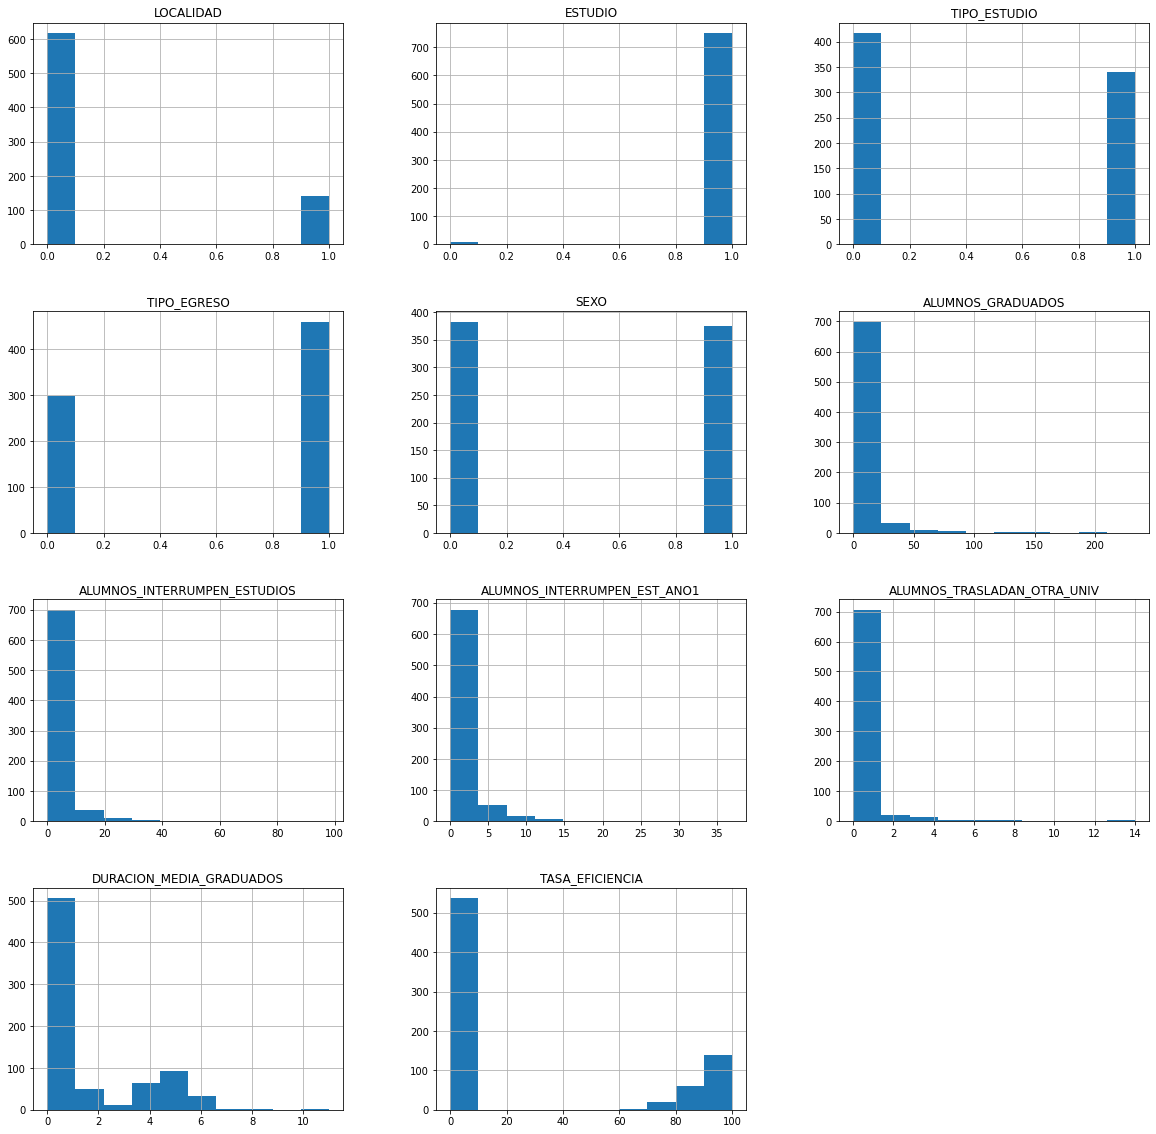

In [19]:
data_set.hist(
    density = False,
    figsize = (20, 20),
    histtype = "bar",
    orientation = "vertical"
)

# **ANÁLISIS DEL "DATA SET" PREPROCESADO**

**ENFOQUE EN LA VARIABLE "GRADUACIÓN"**

In [20]:
print("Variables categóricas: ", categoricals)
print("variables numéricas: ", numerics)

Variables categóricas:  ['LOCALIDAD', 'ESTUDIO', 'TIPO_ESTUDIO', 'TIPO_EGRESO', 'SEXO']
variables numéricas:  ['ALUMNOS_GRADUADOS', 'ALUMNOS_INTERRUMPEN_ESTUDIOS', 'ALUMNOS_INTERRUMPEN_EST_ANO1', 'ALUMNOS_TRASLADAN_OTRA_UNIV', 'DURACION_MEDIA_GRADUADOS', 'TASA_EFICIENCIA']


In [21]:
egresados = data_set[data_set[categoricals[3]] == 0]
no_egresados = data_set[data_set[categoricals[3]] == 1]
total = len(data_set)
cantidad_egresados = len(egresados)
cantidad_no_egresados = len(no_egresados)
print("Total:", total)
print("Alumnos graduados:", cantidad_egresados)
print("% Egresados:", 1.*cantidad_egresados/total*100.0, "%")
print("Alumnos no graduados:", cantidad_no_egresados)
print("% No egresados:", 1.*cantidad_no_egresados/total*100.0, "%")

Total: 758
Alumnos graduados: 298
% Egresados: 39.31398416886543 %
Alumnos no graduados: 460
% No egresados: 60.68601583113457 %


**CORRELACIONES CON GRADUACIÓN**

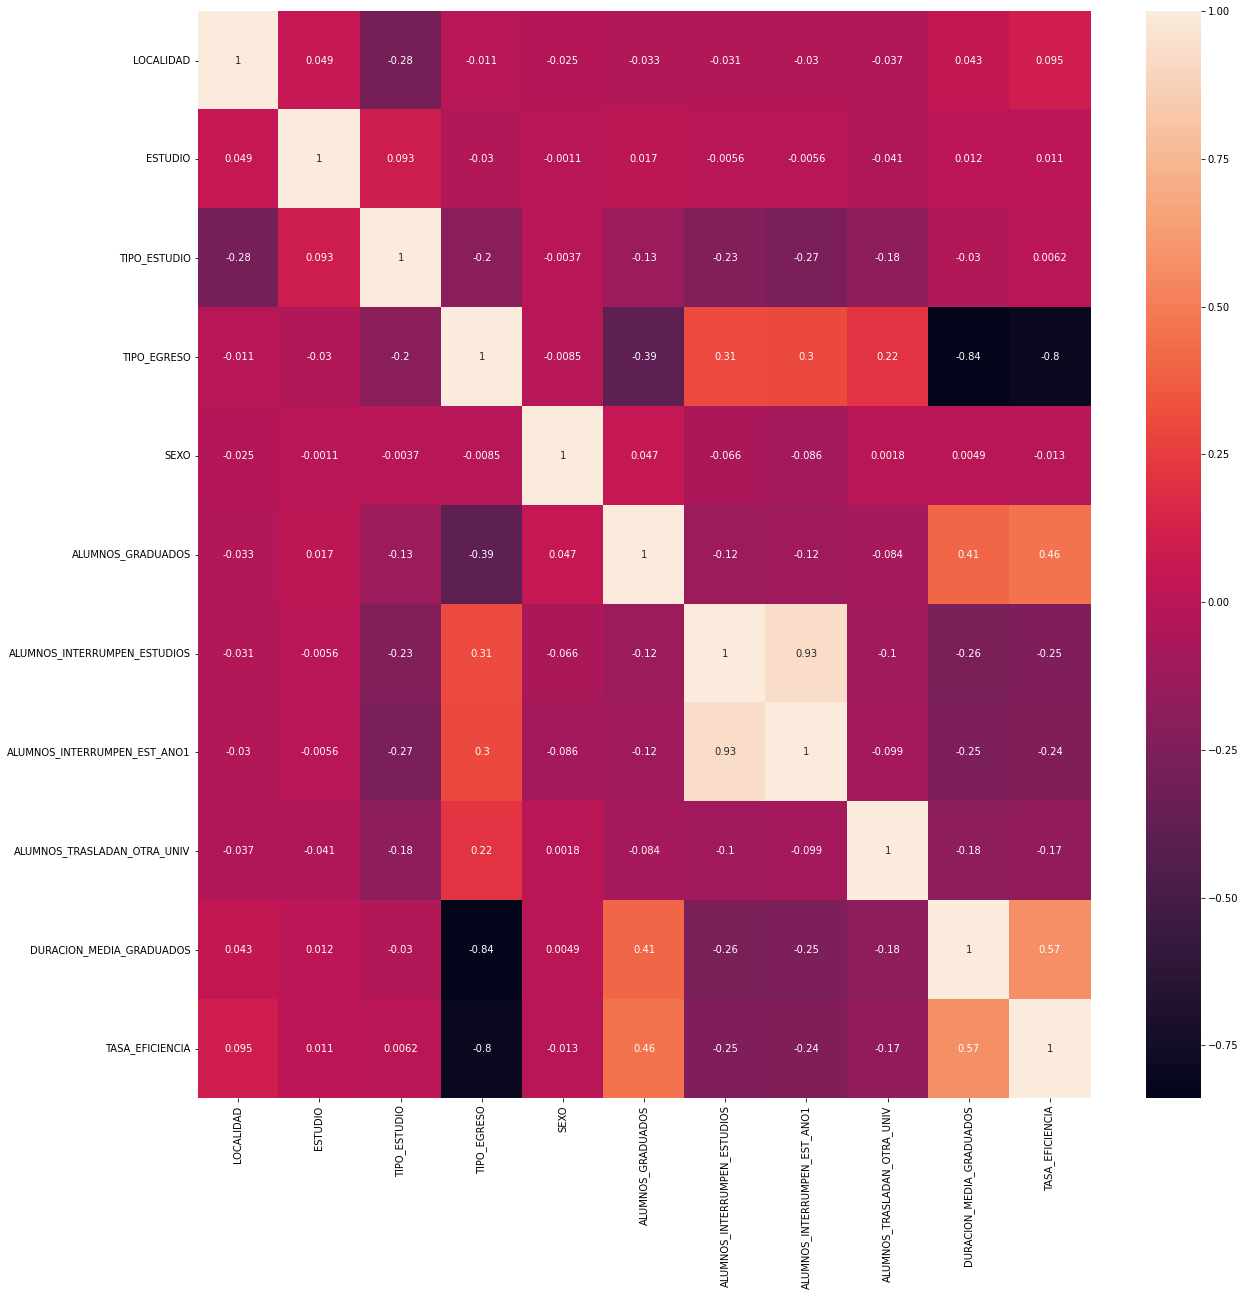

In [22]:
correlations = data_set.corr()
f, ax = matplotlib.pyplot.subplots(figsize = (20, 20))
seaborn.heatmap(correlations, annot=True)

# **SEPARACIÓN DEL "DATA SET"**

**GRUPO DE ENTRADA**

In [23]:
x_num = data_set[
    [
        numerics[4],
        numerics[5],
        numerics[1],
        numerics[2]
    ]
]
x_num

,DURACION_MEDIA_GRADUADOS,TASA_EFICIENCIA,ALUMNOS_INTERRUMPEN_ESTUDIOS,ALUMNOS_INTERRUMPEN_EST_ANO1
0,0.0,0.00,12,5
1,0.0,0.00,5,3
2,0.0,0.00,1,1
3,7.0,70.00,0,0
4,11.0,75.72,0,0
...,...,...,...,...
753,0.0,0.00,0,0
754,0.0,0.00,0,0
755,0.0,0.00,0,0
756,0.0,0.00,0,0


**CODIFICACIÓN DE VALORES**

In [24]:
one_hot_encoder = OneHotEncoder()
x = one_hot_encoder.fit_transform(x_num).toarray()
x = pandas.DataFrame(x)
x

,0,1,2,3,4,5,6,7,8,9,...,351,352,353,354,355,356,357,358,359,360
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
753,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
754,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
755,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
756,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


**UNIFICACIÓN DE "DATA FRAMES"**

In [25]:
x_join = pandas.concat([x, x_num], axis = 1)
x_join

,0,1,2,3,4,5,6,7,8,9,...,355,356,357,358,359,360,DURACION_MEDIA_GRADUADOS,TASA_EFICIENCIA,ALUMNOS_INTERRUMPEN_ESTUDIOS,ALUMNOS_INTERRUMPEN_EST_ANO1
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,12,5
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,5,3
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,1,1
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,7.0,70.00,0,0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,11.0,75.72,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
753,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0,0
754,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0,0
755,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0,0
756,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0,0


**ESCALADO DE GRUPOS**

In [26]:
scaler = MinMaxScaler()
x_scl = scaler.fit_transform(x_join)
x_scl

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


array([[1.        , 0.        , 0.        , ..., 0.        , 0.12244898,
        0.13513514],
       [1.        , 0.        , 0.        , ..., 0.        , 0.05102041,
        0.08108108],
       [1.        , 0.        , 0.        , ..., 0.        , 0.01020408,
        0.02702703],
       ...,
       [1.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [1.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [1.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

**GRUPO DE SALIDA**

In [27]:
y = data_set[categoricals[3]]
y

0      1
1      1
2      1
3      0
4      0
      ..
753    1
754    1
755    1
756    1
757    1
Name: TIPO_EGRESO, Length: 758, dtype: int64

# **DESARROLLO DEL MODELO**

**ASIGNACIÓN DE PARTES**

In [28]:
x_train, x_test, y_train, y_test = train_test_split(x_scl, y, test_size = 0.25)

In [29]:
x_train.shape

(568, 365)

In [30]:
x_test.shape

(190, 365)

**RED NEURONAL**

In [31]:
model = tensorflow.keras.models.Sequential()
model.add(tensorflow.keras.layers.Dense(
    units = 500,
    activation='relu',
    input_shape=(365, ))
)
model.add(tensorflow.keras.layers.Dense(units = 500, activation='relu'))
model.add(tensorflow.keras.layers.Dense(units = 500, activation='relu'))
model.add(tensorflow.keras.layers.Dense(units = 500, activation='relu'))
model.add(tensorflow.keras.layers.Dense(units = 500, activation='relu'))
model.add(tensorflow.keras.layers.Dense(units = 500, activation='relu'))
model.add(tensorflow.keras.layers.Dense(units = 1, activation='sigmoid'))

In [32]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 500)               183000    
                                                                 
 dense_1 (Dense)             (None, 500)               250500    
                                                                 
 dense_2 (Dense)             (None, 500)               250500    
                                                                 
 dense_3 (Dense)             (None, 500)               250500    
                                                                 
 dense_4 (Dense)             (None, 500)               250500    
                                                                 
 dense_5 (Dense)             (None, 500)               250500    
                                                                 
 dense_6 (Dense)             (None, 1)                 5

In [33]:
model.compile(
    optimizer='Adam',
    loss = 'binary_crossentropy',
    metrics=['accuracy']
)

# **ENTRENAMIENTO DEL MODELO**

**UTILIZACIÓN DE RED NEURONAL**

In [34]:
epochs_hist = model.fit(x_train, y_train, epochs = 100, batch_size=50)

Epoch 1/100
12/12 [==============================] - 1s 21ms/step - loss: 0.2701 - accuracy: 0.9313
Epoch 2/100
12/12 [==============================] - 0s 20ms/step - loss: 0.1034 - accuracy: 0.9824
Epoch 3/100
12/12 [==============================] - 0s 19ms/step - loss: 0.0864 - accuracy: 0.9912
Epoch 4/100
12/12 [==============================] - 0s 19ms/step - loss: 0.0253 - accuracy: 0.9947
Epoch 5/100
12/12 [==============================] - 0s 20ms/step - loss: 0.0268 - accuracy: 0.9947
Epoch 6/100
12/12 [==============================] - 0s 20ms/step - loss: 0.0221 - accuracy: 0.9947
Epoch 7/100
12/12 [==============================] - 0s 19ms/step - loss: 0.0239 - accuracy: 0.9947
Epoch 8/100
12/12 [==============================] - 0s 20ms/step - loss: 0.0226 - accuracy: 0.9947
Epoch 9/100
12/12 [==============================] - 0s 20ms/step - loss: 0.0232 - accuracy: 0.9947
Epoch 10/100
12/12 [==============================] - 0s 21ms/step - loss: 0.0320 - accuracy: 0.9947

In [35]:
y_pred = model.predict(x_test)
y_pred

6/6 [==============================] - 0s 6ms/step


array([[7.6083825e-07],
       [9.4843799e-01],
       [1.0000000e+00],
       [1.0000000e+00],
       [1.2781415e-15],
       [9.4843799e-01],
       [2.4903831e-13],
       [3.7609398e-15],
       [1.0000000e+00],
       [9.4843799e-01],
       [2.4280512e-11],
       [2.2919652e-13],
       [1.0000000e+00],
       [1.0000000e+00],
       [9.4843799e-01],
       [1.0000000e+00],
       [1.2781415e-15],
       [1.0000000e+00],
       [1.0000000e+00],
       [5.8177998e-06],
       [2.7227417e-13],
       [1.0000000e+00],
       [1.0000000e+00],
       [1.0000000e+00],
       [1.0000000e+00],
       [9.8952628e-13],
       [1.0000000e+00],
       [3.9124953e-12],
       [1.3566661e-06],
       [1.0000000e+00],
       [1.0000000e+00],
       [1.6317477e-13],
       [1.0000000e+00],
       [3.1487576e-13],
       [1.0000000e+00],
       [1.8239796e-06],
       [1.0000000e+00],
       [1.0000000e+00],
       [1.0000000e+00],
       [1.0000000e+00],
       [1.0000000e+00],
       [1.000000

# **ANÁLISIS DE RESULTADOS**

**CONVERSIÓN BOOLEANA**

In [36]:
y_pred = (y_pred > 0.5)
y_pred

array([[False],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [

**GRÁFICA DEL MODELO: EVALUACIÓN DE PÉRDIDA**

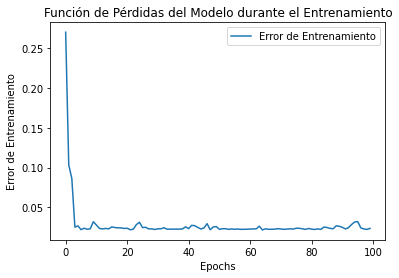

In [37]:
matplotlib.pyplot.plot(epochs_hist.history['loss'])
matplotlib.pyplot.title("Función de Pérdidas del Modelo durante el Entrenamiento")
matplotlib.pyplot.xlabel("Epochs")
matplotlib.pyplot.ylabel("Error de Entrenamiento")
matplotlib.pyplot.legend(["Error de Entrenamiento"])

**GRÁFICA DEL MODELO: EVALUACIÓN DE ACIERTOS**

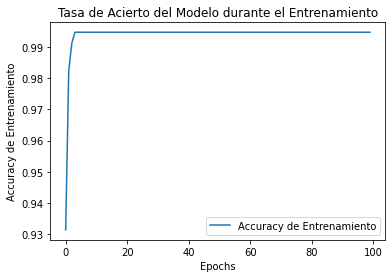

In [38]:
matplotlib.pyplot.plot(epochs_hist.history['accuracy'])
matplotlib.pyplot.title("Tasa de Acierto del Modelo durante el Entrenamiento")
matplotlib.pyplot.xlabel("Epochs")
matplotlib.pyplot.ylabel("Accuracy de Entrenamiento")
matplotlib.pyplot.legend(["Accuracy de Entrenamiento"])

**RESULTADOS DE GRUPO: TEST**

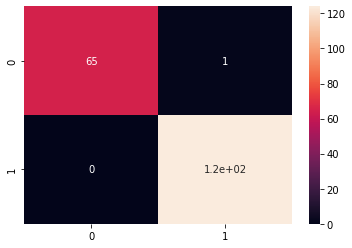

In [39]:
test_result = confusion_matrix(y_test, y_pred)
seaborn.heatmap(test_result, annot=True)

**REPORTE DE PREDICCIÓN**

In [40]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99        66
           1       0.99      1.00      1.00       124

    accuracy                           0.99       190
   macro avg       1.00      0.99      0.99       190
weighted avg       0.99      0.99      0.99       190

